Name: Omkar Deepak Chavan

Roll No.: 210280

## Problem Statement:

 Analysing the time series data of pollutants' concentrations of Singrauli Coalfield to find blasting time and trends among the data.

--------------------------------------------------------------------------------------------------------------------------------

The air pollution data set was obtained from the Singrauli Coalfield Pollution Control Board for
coal India’s (Singrauli Coalfield). The pollution was monitored during open-pit blasting.
There are 13 columns overall in the air pollution data collection of pollutants that are available
at intervals of 15 minutes. 

The project is divided into following parts:

1) Data Exploratory Analysis(Exploring the data)

2) Forecasting (Prediction of data from historical data using methods like ARIMA)

3) Finding Combined Weighted Combination of air polluting factors

4) Finding blasting time and relevant analysis

5) Curve Fitting

In [1]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
%matplotlib inline

In [3]:
file_path = 'C:/Users/Omkar/Desktop/EE798Q/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path , index_col=0)

In [4]:
df.head()

,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
#,,,,,,,,,,,,
1,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8643 entries, 1 to 8643
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   From                                                      8643 non-null   object 
 1   To (Interval: 15M)                                        8640 non-null   object 
 2   Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)     6962 non-null   float64
 3   Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)    8417 non-null   float64
 4   Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)       7274 non-null   float64
 5   Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)      8227 non-null   float64
 6   Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)        8228 non-null   float64
 7   Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)       8147 non-null   float64
 8   Singrauli, Surya K

In [6]:
# Simplify column names
df.columns = ['from', 'to', 'PM10', 'PM2.5', 'NO','NO2','NOX','CO','SO2','NH3','Ozone','Benzene']

Text(0.5, 1.0, 'Multivariate Time Series')

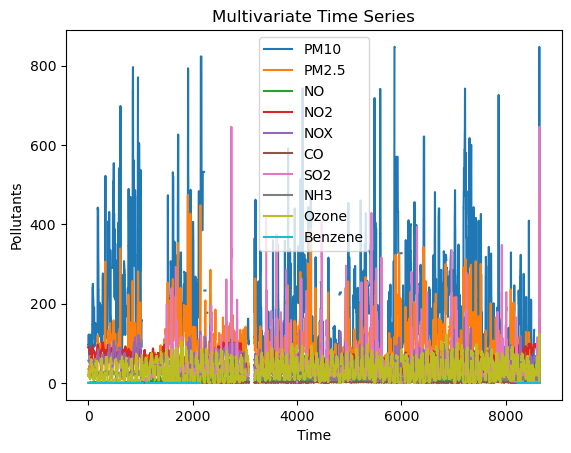

In [7]:
df.plot()
plt.xlabel('Time')
plt.ylabel('Pollutants')
plt.title('Multivariate Time Series')

In [8]:
# deleting to column as we need only one timestamp column for to be index and we choose it to be from column
df = df.drop('to', axis=1)

In [9]:
# removing last 3 rows as they contaion max , min , avg data instead of actual observations
df = df.iloc[:-3]
df.tail()

,from,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
#,,,,,,,,,,,
8636,2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8637,2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8638,2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1
8639,2023-05-01 23:30:00,19.0,11.0,20.8,100.2,70.2,0.58,9.5,10.8,30.0,0.1
8640,2023-05-01 23:45:00,32.0,6.0,21.8,98.8,70.3,NaN,NaN,11.0,33.5,0.1


In [10]:
# conveting timestamp as a string object into a datetime numerical 
date_format = '%Y-%m-%d %H:%M:%S'

# Convert the 'from' column to numerical datetime representation
df['from'] = pd.to_datetime(df['from'], format=date_format)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8640 entries, 1 to 8640
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   from     8640 non-null   datetime64[ns]
 1   PM10     6959 non-null   float64       
 2   PM2.5    8414 non-null   float64       
 3   NO       7271 non-null   float64       
 4   NO2      8224 non-null   float64       
 5   NOX      8225 non-null   float64       
 6   CO       8144 non-null   float64       
 7   SO2      7189 non-null   float64       
 8   NH3      8314 non-null   float64       
 9   Ozone    8187 non-null   float64       
 10  Benzene  2445 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 810.0 KB


In [12]:
# set datetime "from" column as an index column
df.set_index('from', inplace=True)
df.head()

,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
from,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4


# Part 1: Exploring the data

In this part of analysis, we look at all the variables(pollutants here) all at a time. 

Text(0.5, 1.0, 'Multivariate Time Series')

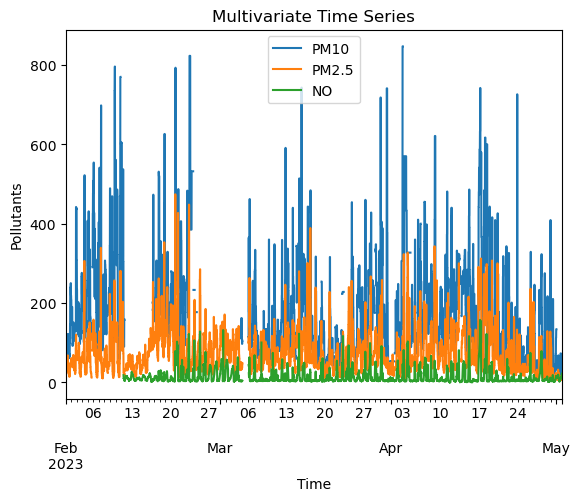

In [13]:
# 1. Plotting several columns and finding out which ones affect more.
# code to plot several columns at a time

columns_to_plot=['PM10','PM2.5', 'NO']

data_to_plot = df[columns_to_plot]    
data_to_plot.plot()
plt.xlabel('Time')
plt.ylabel('Pollutants')
plt.title('Multivariate Time Series')

Text(0.5, 1.0, 'Multivariate Time Series')

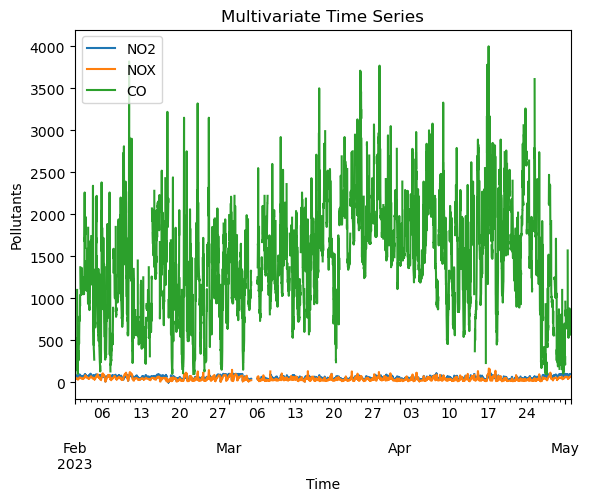

In [14]:
columns_to_plot=['NO2','NOX','CO']
df['CO']*=1000
data_to_plot = df[columns_to_plot]    
data_to_plot.plot()
plt.xlabel('Time')
plt.ylabel('Pollutants')
plt.title('Multivariate Time Series')

From Multivariate plot we can observe that some of the variables have significant concentration in the pollutants whereas some pollutants have comparatoively less concentration (such as Benzene and NH3).

Text(0.5, 1.0, 'Multivariate Time Series')

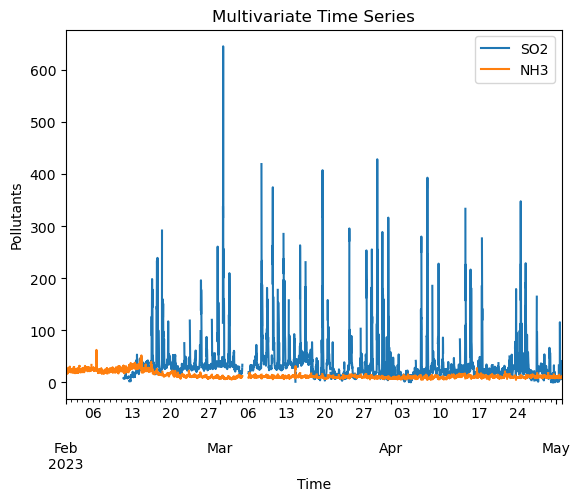

In [15]:
columns_to_plot=['SO2','NH3']

data_to_plot = df[columns_to_plot]    
data_to_plot.plot()
plt.xlabel('Time')
plt.ylabel('Pollutants')
plt.title('Multivariate Time Series')

We can observe that NH3 has very less concentration as compared to that of SO2.

Text(0.5, 1.0, 'Multivariate Time Series')

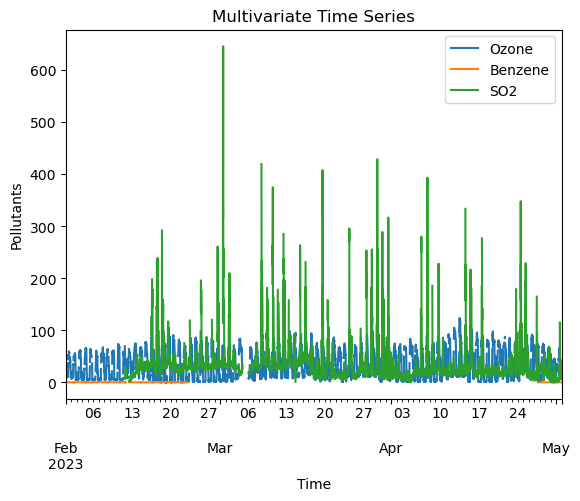

In [16]:
columns_to_plot=['Ozone','Benzene','SO2']

data_to_plot = df[columns_to_plot]    
data_to_plot.plot()
plt.xlabel('Time')
plt.ylabel('Pollutants')
plt.title('Multivariate Time Series')

We can observe that Benzene has very less concentration as compared to that of Ozone and benzene.

# Data Preprocessing

As we can see, the dataset has some null values. We will have to clean them by replacing them by nan values and filling them afterwards.So now we have to fix missing values.

Handling missing values
3 ways
1) Replacing with zeroes 
2) Replacing with mean
3) Interpolation  

We will test the effect of replacing missing values with each of zero, mean , interpolated data by taking the example of NO dataset.

# NO Analysis

In [17]:
s1= df['NO'].copy()

## 1) Replacing missing values with zeroes

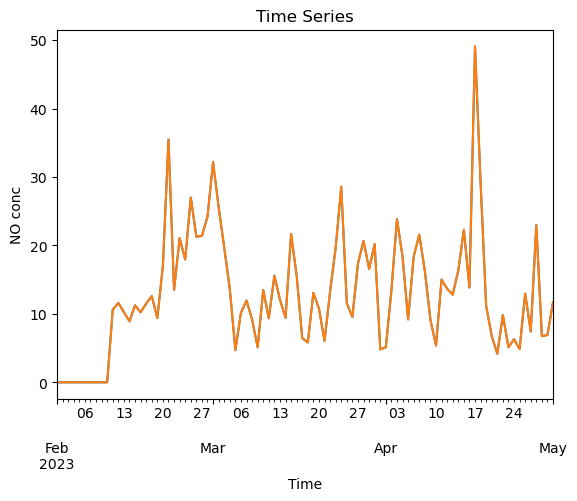

from
2023-02-01    0.0
2023-02-02    0.0
2023-02-03    0.0
2023-02-04    0.0
2023-02-05    0.0
Freq: D, Name: NO, dtype: float64

In [18]:

# Resample the time series to a different frequency (e.g., from hourly to daily)


# resampling
s1=s1.resample('D').mean()
s1.fillna(0, inplace=True)
s1.plot()      
# s will be dataseries

s1.plot()
plt.xlabel('Time')
plt.ylabel('NO conc')
plt.title('Time Series')
plt.show()
s1.head()

In [19]:
s1

from
2023-02-01     0.000000
2023-02-02     0.000000
2023-02-03     0.000000
2023-02-04     0.000000
2023-02-05     0.000000
                ...    
2023-04-27     7.424731
2023-04-28    22.978495
2023-04-29     6.743011
2023-04-30     6.916304
2023-05-01    11.701075
Freq: D, Name: NO, Length: 90, dtype: float64

Conducting ADF test to check for stationarity of time series data.

In [20]:
 from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(s1)
print(f'p-value: {adf_test[1]}')

p-value: 9.42588901782776e-06


 A very low p value implies that it is indeed stationary.

Now we try to attempt ARIMA model on this zero-replaced data.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


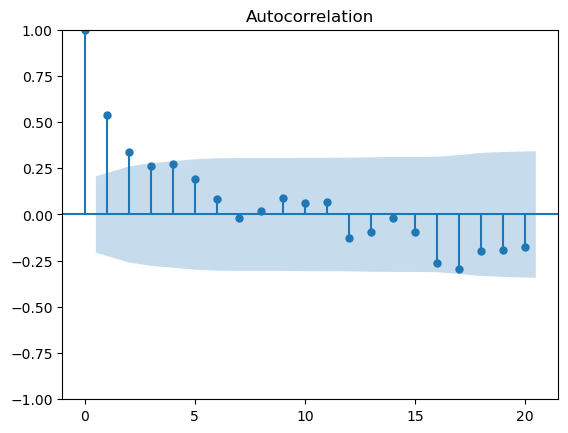

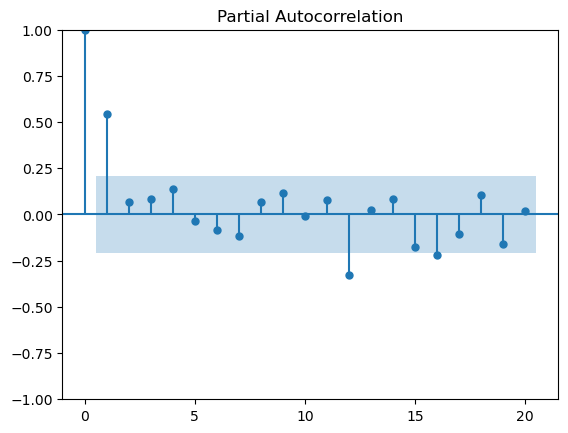

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(s1)

pacf_original = plot_pacf(s1)

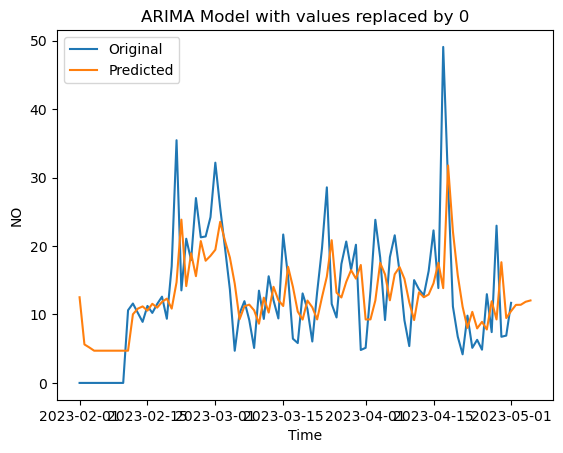

In [22]:
%matplotlib inline
data_series = s1
data_series = pd.Series(data_series)
model = sm.tsa.ARIMA(data_series, order=(3, 0, 0))
result = model.fit()
predictions = result.predict(start='2023-02-01', end='2023-05-05')
plt.plot(data_series, label='Original')   
# label indicates color and corresponding value
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('NO')
plt.title('ARIMA Model with values replaced by 0')
plt.legend()
plt.show()

We can observe that prediction by ARIMA deviates largely at points where NA values are replaced by zeroes. So, it seems naive to replace missing values with zeroes.

## 2) Replacing missing values with mean.

In [23]:
s2= df['NO'].copy()

In [24]:
# Calculate the mean of non-null values
# Replace missing values with the mean
s2=s2.resample('D').mean()
s2.fillna(14.65, inplace=True)   
# 14.65 is the mean of non NA values
s2

from
2023-02-01    14.650000
2023-02-02    14.650000
2023-02-03    14.650000
2023-02-04    14.650000
2023-02-05    14.650000
                ...    
2023-04-27     7.424731
2023-04-28    22.978495
2023-04-29     6.743011
2023-04-30     6.916304
2023-05-01    11.701075
Freq: D, Name: NO, Length: 90, dtype: float64

Conducting ADF test to check for stationarity of time series data.

In [25]:
# just checking code   ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(s2)
print(f'p-value: {adf_test[1]}')

p-value: 8.460261214114683e-08


A very low p value implies that it is indeed stationary.

Now we try to attempt ARIMA model on this mean-replaced data.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


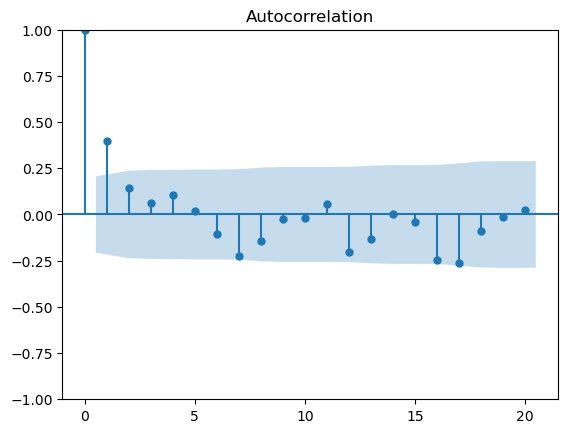

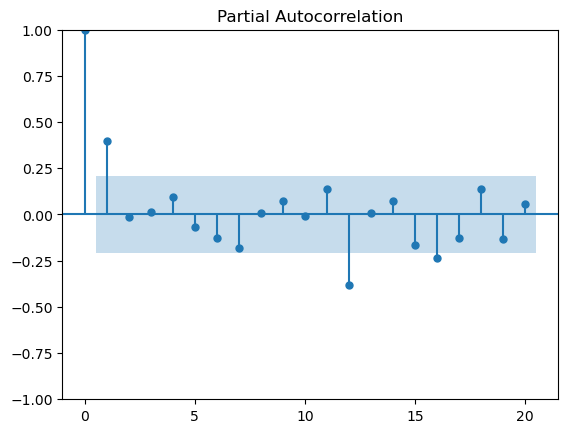

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(s2)

pacf_original = plot_pacf(s2)

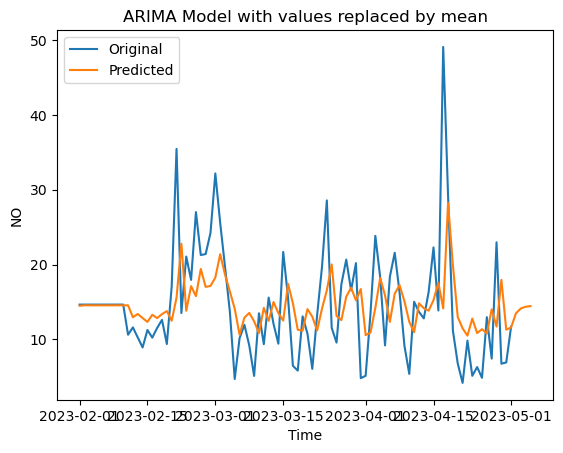

In [27]:
%matplotlib inline
data_series = s2
data_series = pd.Series(data_series)
model = sm.tsa.ARIMA(data_series, order=(2, 0, 0))
result = model.fit()
predictions = result.predict(start='2023-02-01', end='2023-05-05')
plt.plot(data_series, label='Original')   
# label indicates color and corresponding value
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('NO')
plt.title('ARIMA Model with values replaced by mean')
plt.legend()
plt.show()

We can observe that though it is better to replace with mean as compared to that of zeroes , but there are still abnormalities in the plot.
Filling NaNs with the mean value is also not sufficient and naive, and doesn't seem to be a good option.

# 3) Interpolation


Interpolation is used when the intended time(t) falls between the greatest and smallest of the time.
There are 3 ways to interpolate the data to replace missing values:

(a) Linear Interpolation:
This is basically like connecting two points in a dataset by drawing a line between them.

(b) Cubical Interpolation: It offers true continuity between the segments. As such it requires more than just the two endpoints of the segment but also the two points on either side of them.

(c) Spline Interpolation:
Low-degree polynomials are used in each of the intervals in spline interpolation, which is similar to polynomial interpolation in that it selects the polynomial parts to fit together smoothly. The outcome is a function known as a spline.

Here we will use .interpolate() function to interpolate the data.

### 1) Linear interpolation

<Axes: xlabel='from'>

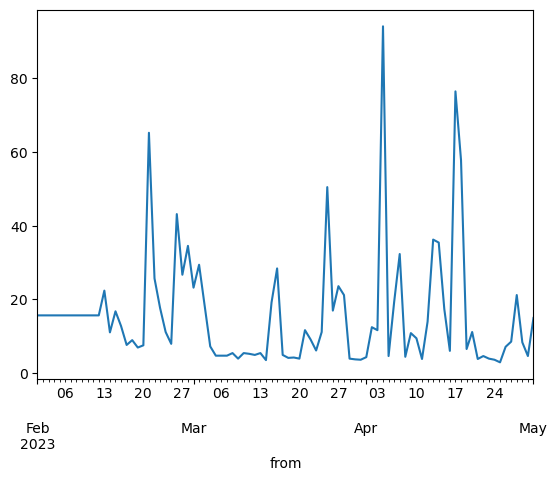

In [28]:

s3=df['NO'].copy()

# Resample the time series to a different frequency (e.g., from hourly to daily)
s3= s3.resample('D')
s3 = s3.interpolate()
s3.fillna(method='ffill', inplace=True)  # Fill missing values forward
s3.fillna(method='bfill', inplace=True)  # Fill missing values backward
s3.plot()

### 2) Cubical interpolation

<Axes: xlabel='from'>

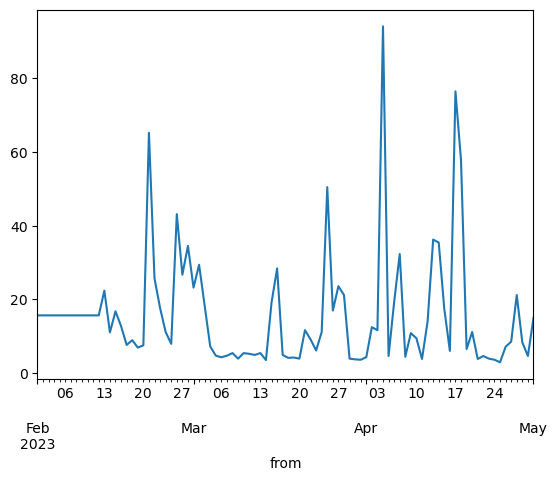

In [29]:
#  cubic interpolation
s4=df['NO'].copy()

# Resample the time series to a different frequency (e.g., from hourly to daily)
s4= s4.resample('D')
s4 = s4.interpolate(method='cubic')
s4.fillna(method='ffill', inplace=True)  # Fill missing values forward
s4.fillna(method='bfill', inplace=True)  # Fill missing values backward
s4.plot()

### 3) Spline Interpolation

<Axes: xlabel='from'>

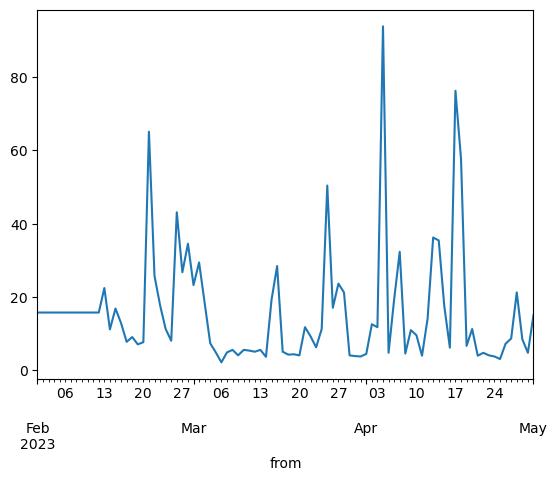

In [30]:
# i) spline interpolation
s5=df['NO'].copy()

# Resample the time series to a different frequency (e.g., from hourly to daily)
s5= s5.resample('D')
s5 = s5.interpolate(method='spline', order=3)
s5.fillna(method='ffill', inplace=True)  # Fill missing values forward
s5.fillna(method='bfill', inplace=True)  # Fill missing values backward

s5.plot()

Now we will plot all 3 - linear, cubical, spline of order 3 together to see which one is the best option.

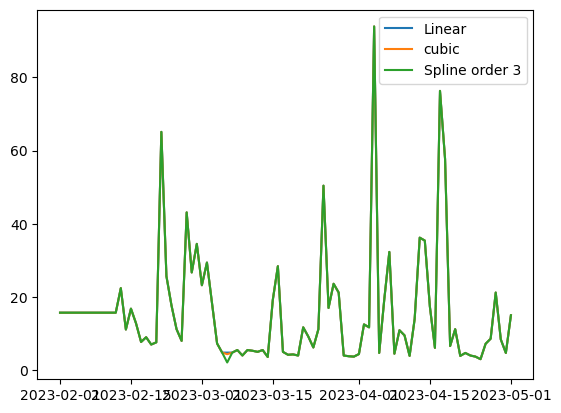

In [31]:
# s3= s3.resample('D')
# s4= s4.resample('D')
# s5= s5.resample('D')
plt.plot(s3, label='Linear')
plt.plot(s4, label='cubic')
plt.plot(s5, label='Spline order 3')
plt.legend()
plt.show()

We can observe that spline interpolation of order 3 provides us with smoothest out of all 3 options.
So, lets interpolate the  missing values with spline interpolation for further analysis.

## Interpolation, ARIMA Comparison

First we will attmept ARIMA without interpolation.

In [32]:
#ARIMA on original
s6=df['NO'].copy()
# Resample the time series to a different frequency (e.g., from hourly to daily)
s6= s6.resample('D').mean()

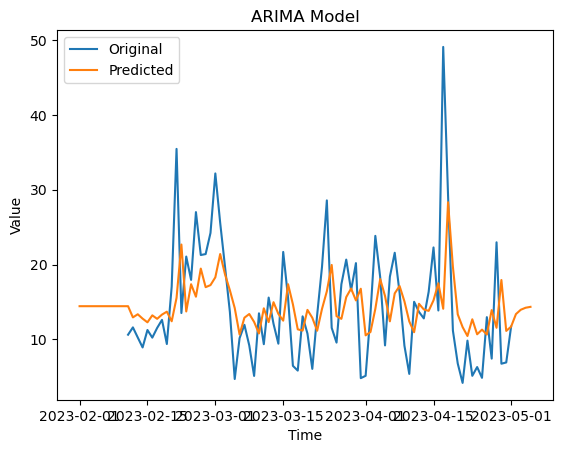

In [33]:
%matplotlib inline
data_series = s6
data_series = pd.Series(data_series)
model = sm.tsa.ARIMA(data_series, order=(3, 0, 0))
result = model.fit()
predictions = result.predict(start='2023-02-01', end='2023-05-05')
plt.plot(data_series, label='Original')   
# label indicates color and corresponding value
plt.plot(predictions, label='Predicted')
# plt.plot(s5, label='spline interpolated')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()

As we can see we cant apply ARIMA on missing values containing data.
We first have to replace missing data with appropriate values.(here we will use interpolation(spline 3rd order))

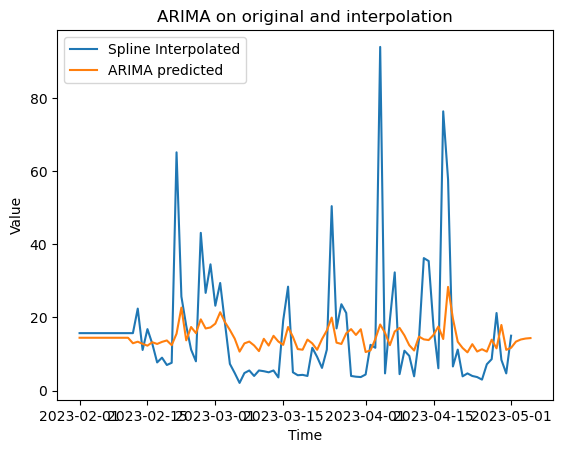

In [34]:
#plot s5 and s6 together
plt.plot(s5, label='Spline Interpolated')
plt.plot(predictions, label='ARIMA predicted')


# Set x and y labels, and plot title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA on original and interpolation')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Now we will do ARIMA on spline interpolated data

In [35]:
#Now doing ARIMA on interpolated data
s7=df['NO'].copy()
s8=df['NO'].copy()
s8= s8.resample('D').mean()

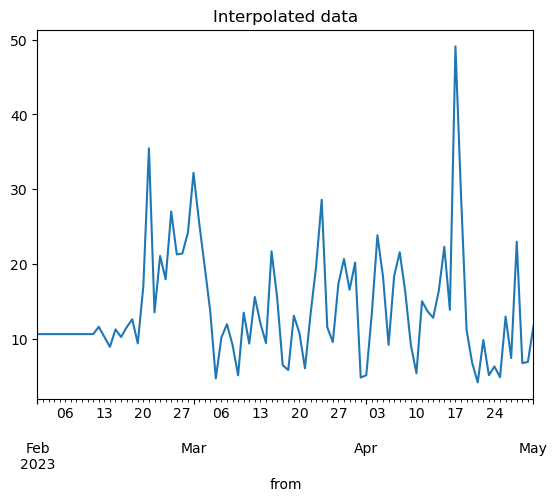

In [36]:
# interpolation first
# interpolating
s7= s7.resample('D').mean()
s7 = s7.interpolate(method='spline', order=3)
s7.fillna(method='ffill', inplace=True)  # Fill missing values forward
s7.fillna(method='bfill', inplace=True)  # Fill missing values backward
# Resample the time series to a different frequency (e.g., from hourly to daily)

s7.plot()
plt.title('Interpolated data')
plt.show()

In [37]:
s7

from
2023-02-01    10.622222
2023-02-02    10.622222
2023-02-03    10.622222
2023-02-04    10.622222
2023-02-05    10.622222
                ...    
2023-04-27     7.424731
2023-04-28    22.978495
2023-04-29     6.743011
2023-04-30     6.916304
2023-05-01    11.701075
Freq: D, Name: NO, Length: 90, dtype: float64

In [38]:
# ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(s7)
print(f'p-value: {adf_test[1]}')

p-value: 1.4711835715040855e-07


Such a low p-value implies stationarity.

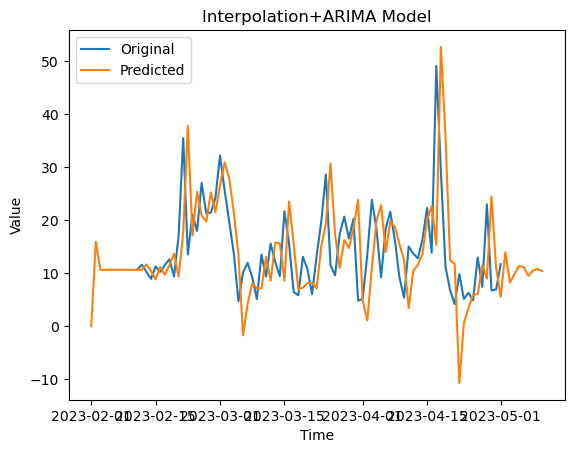

In [39]:
# apply arima on interpolated s7
%matplotlib inline
data_series = s7
data_series = pd.Series(data_series)
model = sm.tsa.ARIMA(data_series, order=(3, 2, 0))
result = model.fit()
predictions = result.predict(start='2023-02-01', end='2023-05-10')
# plt.plot(data_series, label='Interpolated') 
plt.plot(s8, label='Original') 
# label indicates color and corresponding value
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Interpolation+ARIMA Model')
plt.legend()
plt.show()

We can observe that interpolation+ARIMA model works much better than that of ARIMA without interpolation or ARIMA with missing values replaced by zeroes and mean.
Hence interpolation+ARIMA works better than ARIMA or interpolation individually

## Smoothing data / Resampling

Resampling can provide additional information on the data.Resampling helps in smoothening the curve.

There are two types of resampling: 

Upsampling is when the frequency of samples is increased (e.g. days to hours)

Downsampling is when the frequency of samples is decreased (e.g. days to weeks)


In this modelling and for all other upcoming models, we will do some downsampling with the .resample() function from 15 min interval to days and also we will use spline cubic interpolation for filling missing data.

# Part 2: Forecasting 

## Prediction Analysis for 'NO' data

Here we will apply ARIMA modelling to predict the future data for NO concentration.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8640 entries, 2023-02-01 00:00:00 to 2023-05-01 23:45:00
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM10     6959 non-null   float64
 1   PM2.5    8414 non-null   float64
 2   NO       7271 non-null   float64
 3   NO2      8224 non-null   float64
 4   NOX      8225 non-null   float64
 5   CO       8144 non-null   float64
 6   SO2      7189 non-null   float64
 7   NH3      8314 non-null   float64
 8   Ozone    8187 non-null   float64
 9   Benzene  2445 non-null   float64
dtypes: float64(10)
memory usage: 1000.5 KB


In [41]:
df2=df.copy()

In [42]:
# interpolating
NO = df2['NO']
df2['NO'] = df2['NO'].interpolate(method='spline',order=3)
df2['NO'].fillna(method='ffill', inplace=True)  # Fill missing values forward
df2['NO'].fillna(method='bfill', inplace=True)  # Fill missing values backward

Here we will take some part of our data as training set for ARIMA modelling while the remaing part will be predicted by the model. Then we will compare the actual data and the predicted data.

In [43]:
t=df2.index[8000]
# msk = (df.index <= pd.to_datetime(t, format='%y-%m-%d %H:%M:%S'))
msk=(df2.index<=t)

df_train = df2['NO'][msk].copy()
df_test = df2['NO'][~msk].copy()

In [44]:
t

Timestamp('2023-04-25 08:00:00')

In [45]:
# just checking code   ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df2['NO'])
print(f'p-value: {adf_test[1]}')

p-value: 3.58739703711905e-24


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


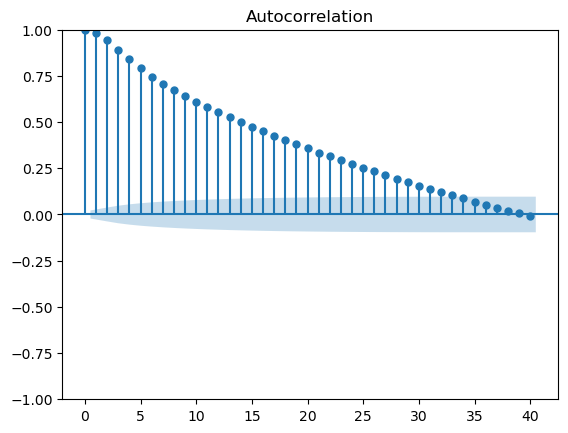

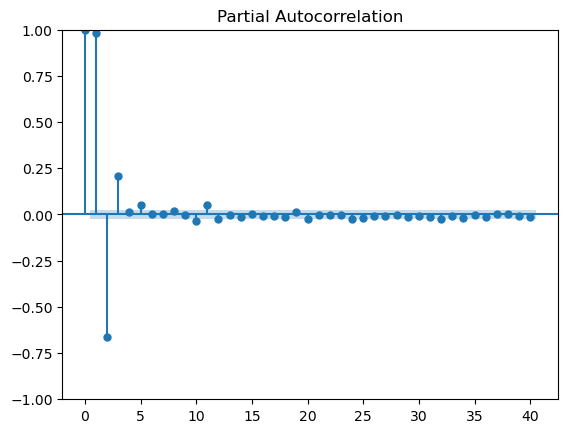

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [47]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(3,0,1))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     NO   No. Observations:                 8001
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -19718.727
Date:                Tue, 27 Jun 2023   AIC                          39449.454
Time:                        17:03:52   BIC                          39491.378
Sample:                    02-01-2023   HQIC                         39463.804
                         - 04-25-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1851      2.291      7.066      0.000      11.696      20.675
ar.L1          1.9229      0.031     61.133      0.000       1.861       1.985
ar.L2         -1.2467      0.052    -23.984      0.0

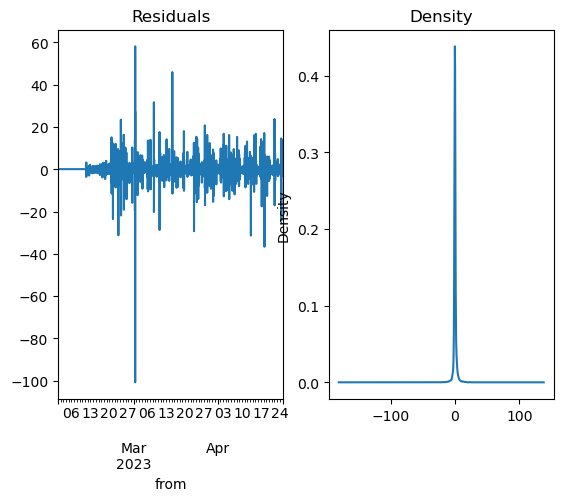

In [48]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


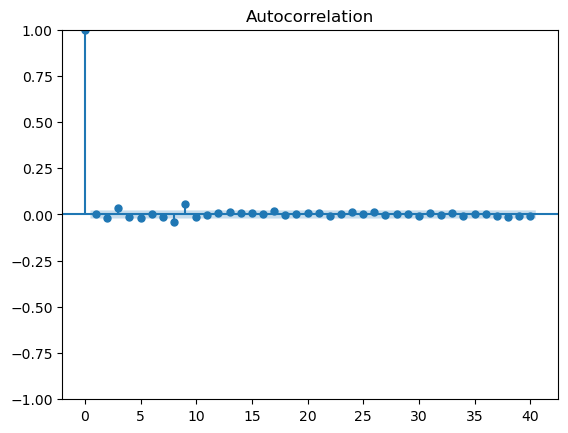

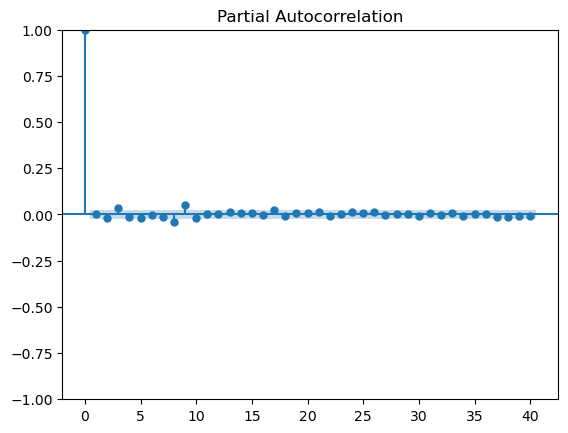

In [49]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: xlabel='from'>

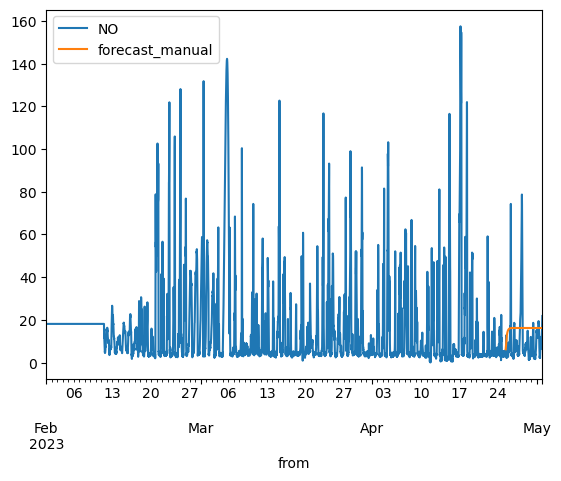

In [50]:
forecast_test = model_fit.forecast(len(df_test))

df2['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

columns_to_plot = ['NO', 'forecast_manual']
data_to_plot = df2[columns_to_plot]
data_to_plot.plot()

# Trying with resampled data

In [51]:
df3=df.copy()

In [52]:
p2=df3['NO']

In [53]:
# resample
df3 = df3.resample('D').mean()
# interpolating
NO = df3['NO']
df3 = df3.interpolate(method='spline',order=3)
df3.fillna(method='ffill', inplace=True)  # Fill missing values forward
df3.fillna(method='bfill', inplace=True)  # Fill missing values backward

In [54]:
df3.head()

,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
from,,,,,,,,,,
2023-02-01,114.739583,35.145833,10.622222,79.180645,48.821505,441.182796,10.244681,22.080851,30.076744,0.232292
2023-02-02,177.458333,52.020833,10.622222,79.286957,53.986957,1303.152174,10.244681,22.266667,25.331183,0.120000
2023-02-03,171.270833,52.916667,10.622222,82.408602,56.936559,1211.075269,10.244681,23.105319,27.535106,0.165625
2023-02-04,222.552941,74.651685,10.622222,76.781319,53.721978,1146.222222,10.244681,25.094565,26.340659,0.184444
2023-02-05,271.354430,86.987952,10.622222,74.712048,66.445783,890.357143,10.244681,25.571429,21.824706,0.214286


In [55]:
t=df3.index[70]
# msk = (df.index <= pd.to_datetime(t, format='%y-%m-%d %H:%M:%S'))
msk=(df3.index<=t)
df_train =df3['NO'][msk].copy()
df_test = df3['NO'][~msk].copy()

In [56]:
t

Timestamp('2023-04-12 00:00:00', freq='D')

In [57]:
# just checking code   ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df3['NO'])
print(f'p-value: {adf_test[1]}')

p-value: 1.4711835715040855e-07


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


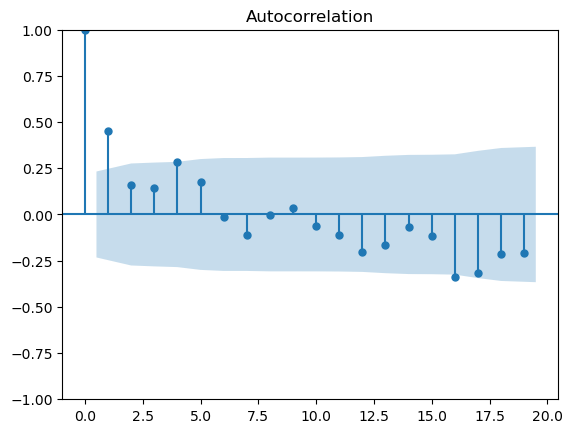

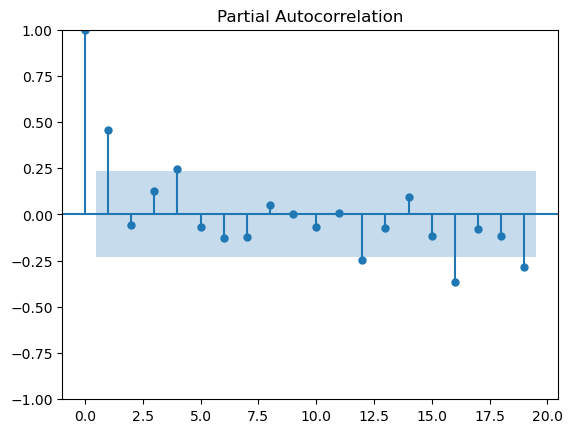

In [58]:
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [59]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(5,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     NO   No. Observations:                   71
Model:                 ARIMA(5, 0, 1)   Log Likelihood                -220.242
Date:                Tue, 27 Jun 2023   AIC                            456.485
Time:                        17:03:55   BIC                            474.586
Sample:                    02-01-2023   HQIC                           463.683
                         - 04-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4992      0.512     28.329      0.000      13.496      15.502
ar.L1          1.3650      0.129     10.561      0.000       1.112       1.618
ar.L2         -0.4885      0.189     -2.583      0.0

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


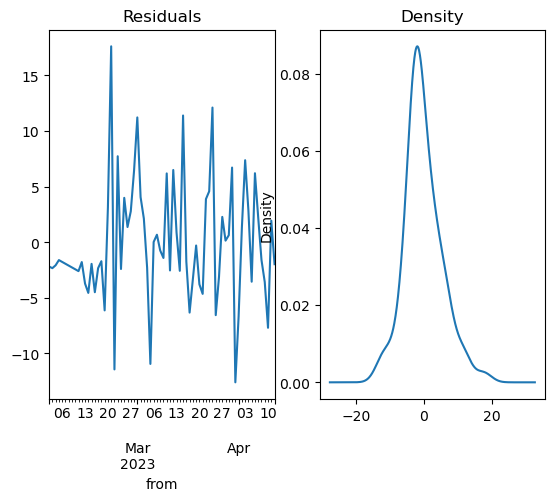

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


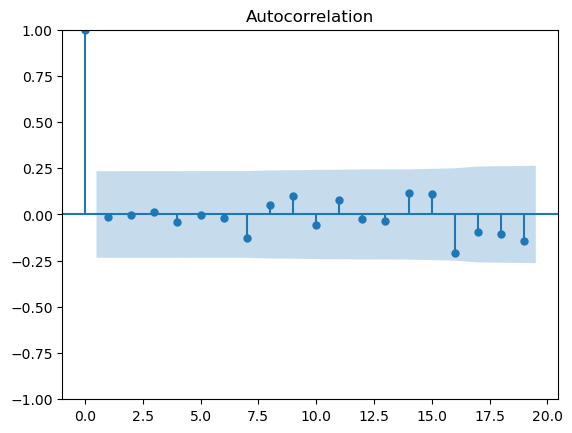

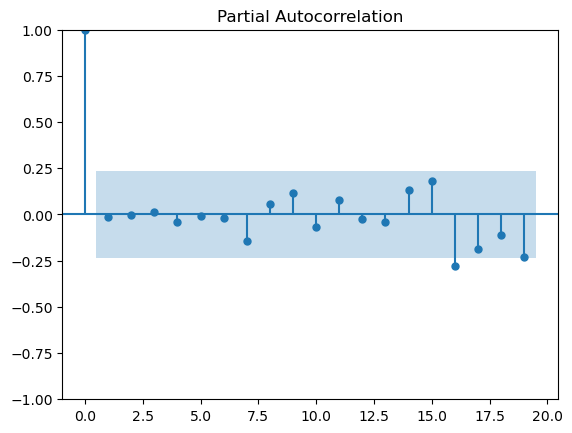

In [61]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2023-02-01 to 2023-05-01
Freq: D
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM10     90 non-null     float64
 1   PM2.5    90 non-null     float64
 2   NO       90 non-null     float64
 3   NO2      90 non-null     float64
 4   NOX      90 non-null     float64
 5   CO       90 non-null     float64
 6   SO2      90 non-null     float64
 7   NH3      90 non-null     float64
 8   Ozone    90 non-null     float64
 9   Benzene  90 non-null     float64
dtypes: float64(10)
memory usage: 7.7 KB


<Axes: xlabel='from'>

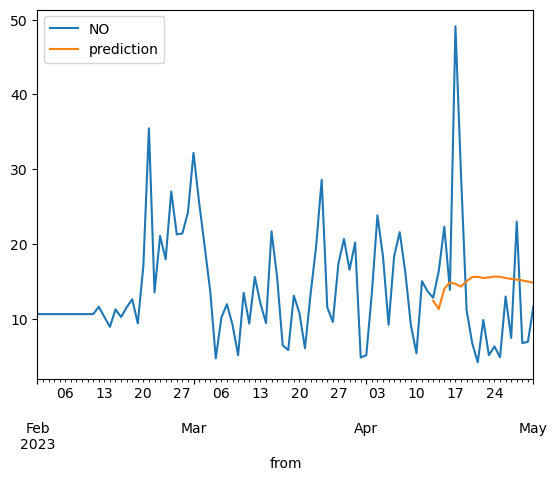

In [63]:
forecast_test = model_fit.forecast(len(df_test))

df3['prediction'] = [None]*len(df_train) + list(forecast_test)
%matplotlib inline
columns_to_plot = ['NO', 'prediction']

data_to_plot = df3[columns_to_plot]

data_to_plot.plot()

Here we can observe that resampled data provides better forecasting than one without it.

Finally we will calculate error of prediction and actual data.

In [64]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 8.524822710545166
mape - manual: 0.8918506939382178
rmse - manual: 11.10568140395216


# Using Auto arima

In [65]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(4, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [66]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -227.127
Date:                Tue, 27 Jun 2023   AIC                            464.253
Time:                        17:03:57   BIC                            475.567
Sample:                    02-01-2023   HQIC                           468.752
                         - 04-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5619      0.091      6.191      0.000       0.384       0.740
ar.L2         -0.0210      0.128     -0.165      0.869      -0.271       0.229
ar.L3          0.0798      0.150      0.533      0.594      -0.213       0.373
ar.L4          0.3364      0.121      2.776      0.005       0.099       0.574
sigma2        34.0082      4.278      7.949      0.000      25.623      42.393
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                13.12
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.33
Prob(H) (two-sided):                  0.73   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

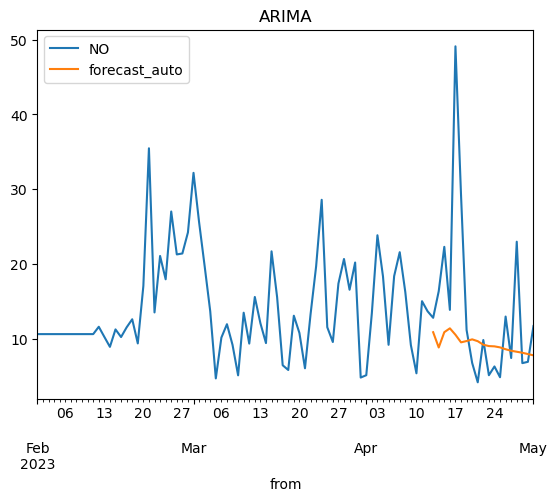

In [67]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df3['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)
%matplotlib inline
columns_to_plot = ['NO', 'forecast_auto']

data_to_plot = df3[columns_to_plot]

data_to_plot.plot()
plt.title('ARIMA')
plt.show()

In [68]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 6.807528250602216
mape - auto: 0.4498355910554497
rmse - auto: 11.258926464904992
